# Sorting Hat w/ One-Hot Encoding

In this exercise, we're going to build another decision tree but with all categorical data, and we're going to do it using one-hot encoding.

## One-Hot Encoding

- One-hot-encoding is a form of **feature engineering** that converts categorical data into a numerical format.
- It creates a binary column for each category in the original feature. The binary column has a value of 1 if the category is present and 0 otherwise.
- This lets us use categorical data in machine learning models that require numerical input.

A simple way to do it in `pandas` is with `pd.get_dummies(df)`.

```python
df = pd.DataFrame({"animal": ["dog", "cat", "dog", "penguin"]})
pd.get_dummies(df)
   animal_cat  animal_dog  animal_penguin
0           0           1               0
1           1           0               0
2           0           1               0
3           0           0               1
```

---

## Exercise


Let's say we wanted to train a model to be a Hogwarts Sorting Hat. Let's use a set of feautures about the student to predict which house they should go into.

Each entry represents a student and some information about them including their `"House"` which will be our label class to train our tree on.

1. Inspect the dataframe and decide which features you want to use for your decision tree to guess the "House".

2. One-hot encode the feature columns using pandas. He's a toy example to use for reference.
   ```python
   # Initial Features
   feature_cols = ["A", "B", "C"]
   
   # Onehot encode all the feature columns and reconstruct the dataframe with the new columns
   onehot_features_df = pd.get_dummies(df[feature_cols]).astype(int)
   label_df = df[["D"]]
   df = pd.concat([label_df, onehot_features_df], axis=1)
   
   # Re-assign the feature_cols to the new column names
   feature_cols = onehot_features_df.columns
   ```

3. Inspect this new dataframe and make sense of what you're seeing.

4. Now go back to our decision tree exercise and use your code from there to train a new tree on this data and evaluate the results.

   Try manipulating aspects of the tree to see if you can get a better accuracy. I don't expect this to be a very accurate model, it's just fun.

5. Plot the tree! I've left some code below to help you do this.

In [17]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Load and clean the data
# I did this part for you!
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/datasets/harry_potter_characters_fixed_clean.csv')
df.columns

feature_cols = ['Gender', 'Blood Status', 'Eye Color', 'Hair Color']

# 1.5. Onehot encode all the features, make sure you create a new feature_cols list
onehot_features_df = pd.get_dummies(df[feature_cols]).astype(int)
label_df = df[["House"]]
df = pd.concat([label_df, onehot_features_df], axis=1)

# Re-assign the feature_cols to the new column names
feature_cols = onehot_features_df.columns

# 2. Train/Test Split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# 3. Create X_train, y_train, X_test, y_test variables
X_train = df_train[feature_cols]
y_train = df_train["House"]
X_test = df_test[feature_cols]
y_test = df_test[feature_cols]

# 4. Train the Model
model = DecisionTreeClassifier(min_samples_split=3)
model.fit(X_train, y_train)

# 5. Evaluate the Model (Report Accuracy as correct/all)
y_pred = model.predict(X_test)

df_test["House Prediction"] = y_pred
accuracy = len(df_test[df_test["House"] == df_test["House Prediction"]]) / len(df_test)
print(f"Accuracy is {accuracy}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Accuracy is 0.6


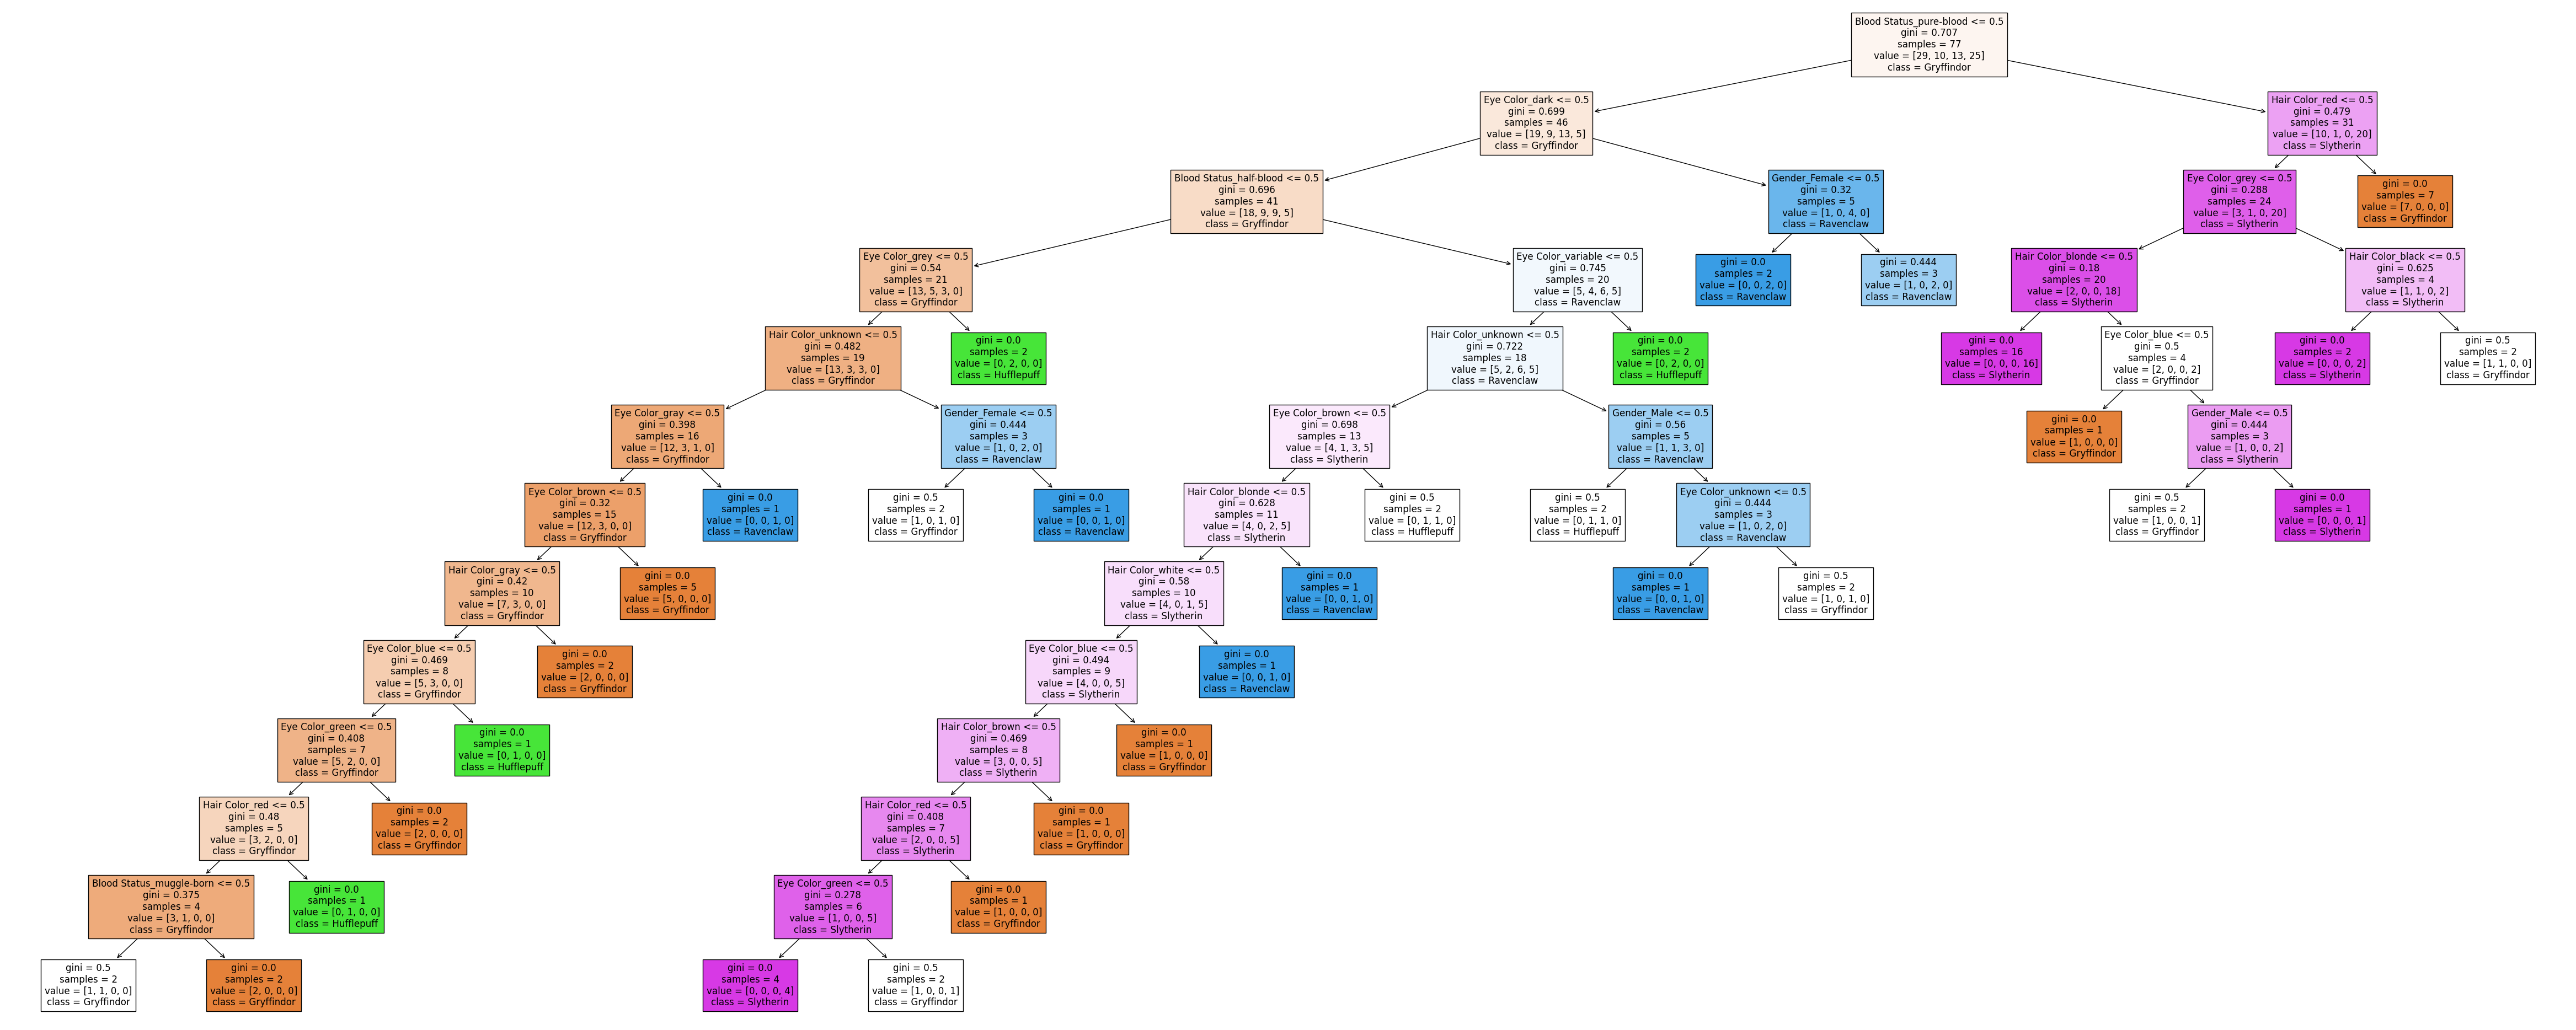

In [18]:
# Plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 24))
plot_tree(model, feature_names=X_train.columns, class_names=sorted(y_train.unique()), filled=True)
plt.show()

In [20]:
df["Eye Color"].unique()

KeyError: 'Eye Color'